In [13]:
import  pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [14]:
data = pd.read_csv('../data/raw/insurance.csv') 

insurance = data.copy() 

Charge le fichier insurance.csv situé dans ../data/raw/.

On travaille sur insurance pour éviter de modifier directement les données brutes (data).

In [15]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


affiche les 5 premières lignes du dataset insurance

In [16]:
insurance.shape

(1338, 7)

Les données contiennent 1338 enregistrements et 7 variables.

In [17]:
insurance.dtypes.value_counts()

object     3
int64      2
float64    2
Name: count, dtype: int64

Les données contiennent trois types de variables : object (texte), int64 (nombres entiers) et float64 (nombres à virgule).

In [18]:
insurance.isna().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
Name: count, dtype: int64

Toutes les variables ne contiennent aucune valeur manquante.

In [19]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Le dataset contient deux variables catégorielles : sex et smoker.

La variable charges a des valeurs différentes pour chaque enregistrement parmi les 1338 lignes (aucune répétition exacte).

C’est donc la variable cible (target) que nous chercherons à prédire

In [20]:
insurance.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


La population est adulte, âgée de 18 à 64 ans, avec une moyenne autour de 39 ans.

L’IMC moyen est élevé : beaucoup de clients sont en surpoids ou obèses.

La majorité des personnes ont 0 à 2 enfants.

Les charges d’assurance varient beaucoup : la plupart paient des montants moyens, mais quelques clients ont des factures très élevées.

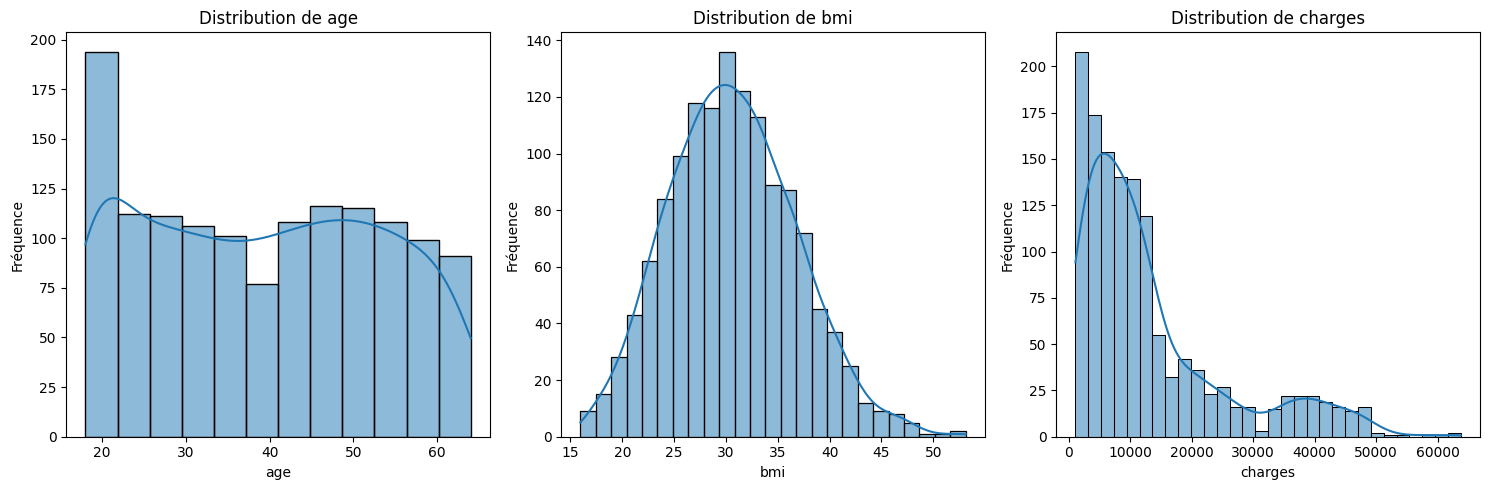

In [21]:
insurance_numeriques = insurance.select_dtypes(include=['int64','float64']).columns.drop(['children'])

fig, axes = plt.subplots(ncols=len(insurance_numeriques),figsize=(5*len(insurance_numeriques),5))

for ax, var in zip(axes,insurance_numeriques):
    sns.histplot(data=insurance, x=var, kde=True, ax=ax)
    ax.set_title(f'Distribution de {var}')
    ax.set_ylabel('Fréquence')
  
plt.tight_layout()
plt.show()

age :la répartition apparaît relativement uniforme sans tendance claire.

Indice de masse corporelle (bmi) : la distribution suit la loi normale, centrée autour de 30, ce qui reflète une population majoritairement en surpoids ou légèrement obèse.

charges : la distribution est asymétrique à droite, avec une majorité d’individus ayant des charges faibles à modérées et une minorité présentant des valeurs très élevées, traduisant la présence de cas extrêmes.

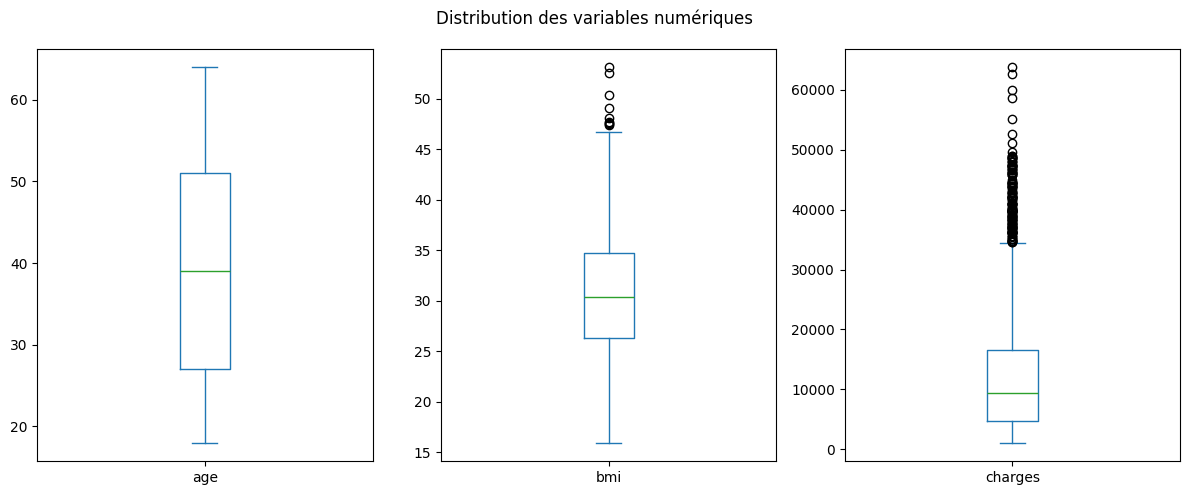

In [25]:
insurance[insurance_numeriques].plot(
    kind='box',
    subplots=True,
    layout=(1, len(insurance_numeriques)),  # organise les plots sur une seule ligne
    figsize=(4 * len(insurance_numeriques), 5),
    title='Distribution des variables numériques',
    sharex=False
)

plt.tight_layout()
plt.show()


On constate que l’âge ne présente pas de valeurs aberrantes, ce qui signifie que sa distribution est régulière.

En revanche, le BMI et les charges contiennent beaucoup de valeurs extrêmes, indiquant une grande variation dans les données.

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<Axes: >

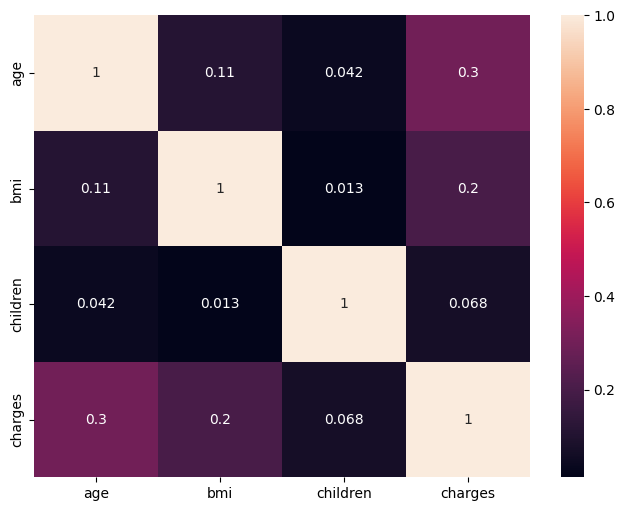

In [23]:
insurance_numeriques_data = insurance.select_dtypes(include=['int64','float64'])

insurance_corr = insurance_numeriques_data.corr()

print(insurance_corr)

plt.figure(figsize=(8,6))
sns.heatmap(insurance_corr, annot=True)

Âge vs Charges (0.30) : Corrélation faible à modérée. Les clients plus âgés ont tendance à avoir des charges légèrement plus élevées.

BMI vs Charges (0.20) : Corrélation faible positive. Un IMC plus élevé entraîne des charges un peu plus élevées.

Children vs Charges (0.07) : Corrélation très faible. Le nombre d’enfants n’influence presque pas les charges.

Entre les variables explicatives : toutes les corrélations sont très faibles , pas de multicolinéarité significative.

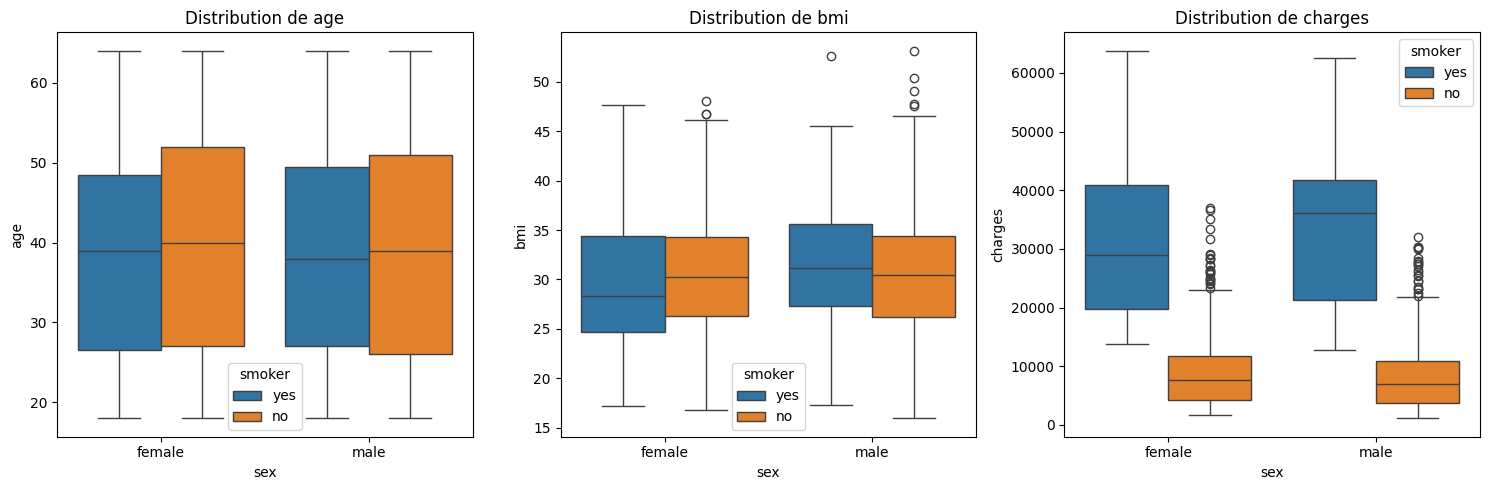

In [24]:
insurance_numeriques = insurance.select_dtypes(include=['int64','float64']).columns.drop(['children'])

fig, axes = plt.subplots(ncols=len(insurance_numeriques),figsize=(5*len(insurance_numeriques),5))

for ax, var in zip(axes,insurance_numeriques):
    sns.boxplot(data=insurance, x='sex', y=var,hue='smoker', ax=ax)
    ax.set_title(f'Distribution de {var}')

plt.tight_layout()
plt.show()

Âge : l’âge moyen des assurés est d’environ 39 ans. On observe peu de différences notables entre fumeurs et non-fumeurs, ni entre hommes et femmes.

Indice de masse corporelle (bmi) : la médiane est proche de 30 pour l’ensemble de la population, avec une répartition similaire entre sexes et statut de fumeur.

Charges médicales : les fumeurs ont des charges nettement plus élevées que les non-fumeurs, et cela quel que soit le sexe. La différence est marquée, traduisant l’impact du tabagisme sur les coûts de santé.